## Telecom Customer Churn Prediction

### Learning outcome:
 ##### ○ Exploratory data analysis & preparing the data for model building.
 ##### ○ Training and making predictions using different classification models.
 ##### ○ Model evaluation

### Domain:
- Telecom

### Dataset Description:
#### Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

- Customers who left within the last month – the column is called Churn
(target)
- Services that each customer has signed up for – phone, multiple lines,
internet, online security, online backup, device protection, tech support,
and streaming TV and movies
- Customer account information – how long they’ve been a customer,
contract, payment method, paperless billing, monthly charges, and total
charges
- Demographic info about customers – gender, age range, and if they have
partners and dependents


### Project Objective:
#### Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention

## ● Load and Explore the data

### 1. Import the required libraries and read the dataset.

In [1]:
## import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
## load the dataset and read them
df = pd.read_csv('TelcomCustomer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# check few samples
df.sample(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5548,4589-IUAJB,Male,0,Yes,No,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.25,1724.15,No
6528,4957-SREEC,Male,0,Yes,Yes,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.35,1458.1,No
3033,5795-KTGUD,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.80,7553.6,No
3365,3865-ZFZIB,Male,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,358.15,No
4174,3285-UCQVC,Female,0,No,No,37,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),28.60,973.55,Yes
5256,1527-SXDPN,Male,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),96.25,4990.25,Yes
6082,4523-WXCEF,Female,0,Yes,No,59,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.10,6039.9,Yes
6236,1932-UEDCX,Male,1,Yes,No,33,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.60,3270.25,No


In [4]:
## check the shape
df.shape

(7043, 21)

In [5]:
## checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Get Correlation of "Churn" with other variables:
df_dummies = pd.get_dummies(df)
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

- , services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

## ● Data Cleaning and Exploratory Data Analysis

### 3. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any

In [6]:
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- no missing values found 

### 4. Check if there are any duplicate records in the dataset? If any drop them

In [7]:
len(df[df.duplicated()])

0

- no duplicate records found

### 5. Drop the columns which you think redundant for the analysis

In [8]:
##drop the columns
df = df.drop(columns=['customerID'])

### 6. Encode the categorical variables 

In [9]:

object_type_variables=[i for i in df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']] if df.dtypes[i]==object]
object_type_variables

le =LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
encoder(df)

In [10]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0.0")


In [11]:
df['TotalCharges']=df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [12]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


- converting all the catogorical data to numarical value using label encoder

### 7. Perform a detailed univariate, bivariate, and multivariate analysis with appropriate plots and add detailed comments after each analysis. 

####  1. Univariante

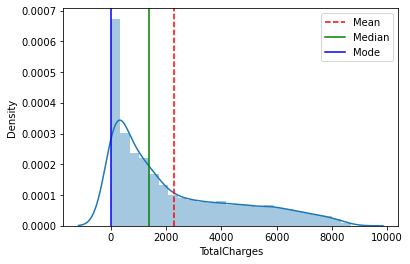

Mean: 2279.734303563826
Median: 1394.55
Mode: 0.0


In [13]:
##Let us understand the distribution of the column 'totalchargers'
mean=df['TotalCharges'].mean()
median=df['TotalCharges'].median()
mode=df['TotalCharges'].mode().values[0]

sns.distplot(df['TotalCharges'])
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')
plt.legend()
plt.show()
print('Mean:',mean)
print("Median:",median)
print('Mode:',mode)

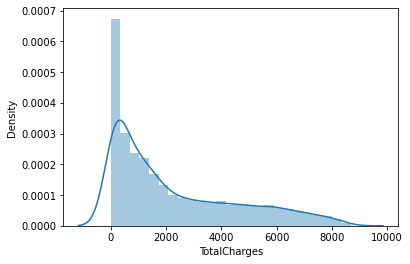

In [14]:
sns.distplot(df['TotalCharges'])
plt.show()

####  - We can observe from the above distribution plot, the totalcharges value is ranging from 0 to 10000 
#### - And also the we can observe that the most of the records fall in between 0 to 2000  range

#### 2. Bivariante

- 1. Statistical methods
 - 1.1 Heatmap

In [15]:
#creates a correlation matrix of data
corr_matrix = df[['MonthlyCharges', 'TotalCharges', 'Churn','tenure']].corr() 
corr_matrix

,MonthlyCharges,TotalCharges,Churn,tenure
MonthlyCharges,1.000000,0.651174,0.193356,0.247900
TotalCharges,0.651174,1.000000,-0.198324,0.826178
Churn,0.193356,-0.198324,1.000000,-0.352229
tenure,0.247900,0.826178,-0.352229,1.000000


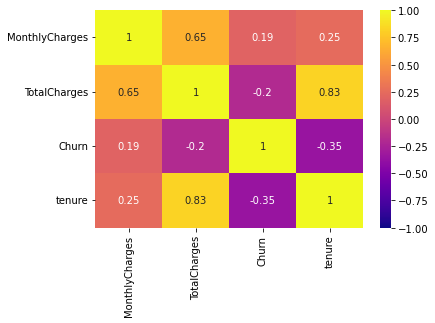

In [16]:
# heatmap helps in visualizing correlation amongst features
sns.heatmap(corr_matrix,annot=True,cmap='plasma',vmin=-1,vmax=1)
plt.show()

-  tenure is having high positive correlation with totalcharges
- totalcharges is having negative correlation with churn

- 2. Continous Vs Continous
 - 2.1 Scatterplot

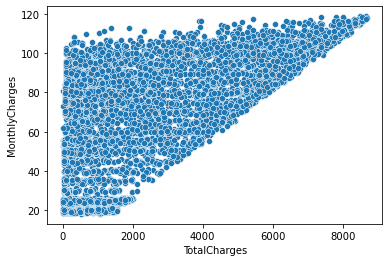

In [17]:
sns.scatterplot(df['TotalCharges'],df['MonthlyCharges'])
plt.show()

-  Here from the above graph it is clear that as the monthly charges are increasing we can experience the total charges also increase which shows the positive correlation too.

#### 3. Multivariante

-  Pairplot

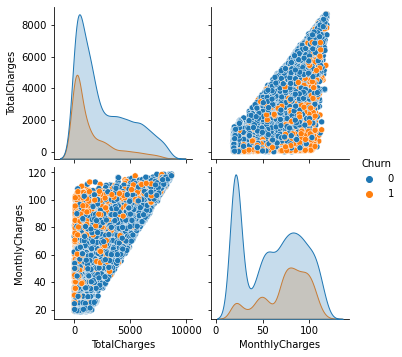

In [18]:
df_pairplot = df[['TotalCharges', 'MonthlyCharges','Churn']]
sns.pairplot(df_pairplot,hue='Churn')
plt.show()

- We can observe from the graph that if churn is 0 the monthly charge and totalcharge is high

 ## Data Preparation for model building 

### 8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable

In [19]:
df1=df.copy()

#i) Encode the categorical variables.
df1=pd.get_dummies(df,drop_first=True)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2626,0,0,1,0,60,0,1,0,2,2,2,0,0,2,1,0,2,50.05,2911.5,0
108,1,0,0,0,43,1,2,1,0,0,0,0,2,2,1,0,3,94.35,3921.3,0
4464,1,0,0,0,12,1,0,1,2,0,2,0,0,0,0,0,0,81.70,858.6,1
4928,0,1,1,1,4,1,0,0,0,0,0,0,0,0,0,0,2,46.00,181.6,1
2784,0,0,0,1,4,1,0,1,0,0,2,2,2,2,0,1,0,98.10,396.3,1


In [20]:
#ii) Store the target column (i.e.Churn) in the y variable and the rest of the columns in the X variable
X=df1[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
y=df1['Churn']

### 9. Split the dataset into two parts (i.e. 70% train and 30% test)

In [21]:
# Scale only numerical features reviews and ratings using StandardScaler
sc = StandardScaler()# create an  object

df_scaled3 = df1.copy()

df_scaled3.iloc[:,:2] = sc.fit_transform(df_scaled3.iloc[:,:2])
df_scaled3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0.990532,-0.439916,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0.990532,-0.439916,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0.990532,-0.439916,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,-1.009559,-0.439916,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### 10. Standardize the columns using z-score scaling approach

In [22]:
 df_zscore = (df - df.mean())/df.std()
#df_zscore  # convert all attributes to Z scale 
df_zscore.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-3.278807e-18,-5.397815e-16,-1.770083e-16,-4.658113e-16,-2.616740e-18,-1.486829e-15,-2.702336e-16,-1.753768e-16,-6.144611e-17,3.398610e-17,-4.700675e-16,2.779735e-16,-1.350932e-16,5.641755e-16,-8.045688e-17,-1.756999e-16,-1.247208e-15,-1.426628e-15,-1.641169e-15,-6.509536e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.009487e+00,-4.398853e-01,-9.665537e-01,-6.539655e-01,-1.318071e+00,-3.053794e+00,-9.915179e-01,-1.183150e+00,-9.187725e-01,-1.029846e+00,-1.027837e+00,-9.251964e-01,-1.113416e+00,-1.121326e+00,-8.281481e-01,-1.205028e+00,-1.473947e+00,-1.545750e+00,-1.005708e+00,-6.009808e-01
25%,-1.009487e+00,-4.398853e-01,-9.665537e-01,-6.539655e-01,-9.516141e-01,3.274151e-01,-9.915179e-01,-1.183150e+00,-9.187725e-01,-1.029846e+00,-1.027837e+00,-9.251964e-01,-1.113416e+00,-1.121326e+00,-8.281481e-01,-1.205028e+00,-5.377090e-01,-9.724708e-01,-8.298875e-01,-6.009808e-01
50%,9.904615e-01,-4.398853e-01,-9.665537e-01,-6.539655e-01,-1.372647e-01,3.274151e-01,6.271830e-02,1.722380e-01,2.442244e-01,1.063077e-01,1.085925e-01,2.355016e-01,1.652477e-02,8.502182e-03,-8.281481e-01,8.297386e-01,3.985294e-01,1.857195e-01,-3.905005e-01,-6.009808e-01
75%,9.904615e-01,-4.398853e-01,1.034457e+00,1.528916e+00,9.213896e-01,3.274151e-01,1.116954e+00,1.722380e-01,1.407221e+00,1.242462e+00,1.245022e+00,1.396200e+00,1.146466e+00,1.138330e+00,3.712447e-01,8.297386e-01,3.985294e-01,8.337743e-01,6.647562e-01,1.663710e+00
max,9.904615e-01,2.272997e+00,1.034457e+00,1.528916e+00,1.613587e+00,3.274151e-01,1.116954e+00,1.527626e+00,1.407221e+00,1.242462e+00,1.245022e+00,1.396200e+00,1.146466e+00,1.138330e+00,1.570637e+00,8.297386e-01,1.334768e+00,1.794225e+00,2.825605e+00,1.663710e+00


## ● Model Building and Evaluation

### 11. Write a function
     i) Which can take the model and data as inputs.
     ii) Fit the model with the train data.
     iii) Make predictions on the test set.
     iv) Returns the Accuracy Score.

In [23]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fits the model with the train data

    pred = model.predict(X_test)  # makes predictions on the test set

    accuracy = accuracy_score(y_test, pred)
                   
    return accuracy  # return all the metrics

### 12. Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.

In [32]:
## Intializing the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

estimators = [('rf', rf),('knn', knn), ('dt',dt), ('nb', nb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [33]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

### 13. Display and compare all the models designed with their test accuracies

In [34]:
result

,Accuracy
Logistic Regression,0.801230
Naive Bayes,0.755797
KNN,0.758637
Decision tree,0.732134
Random Forest,0.784193
Stacking,0.753904


### 14. Select the final best trained model along with your detailed comments for selecting this model.

In [35]:
# We will use the data frame where we had created dummy variables
df_dummies = pd.get_dummies(df)
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [36]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [38]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8054898248935163


AxesSubplot(0.125,0.125;0.775x0.755)


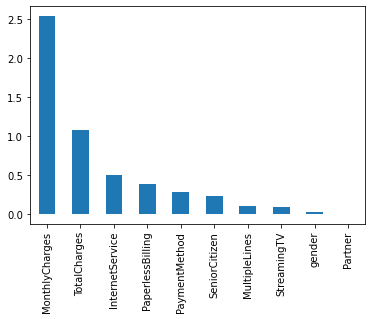

In [39]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

- From Model:-
   - It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1.
   - We see that the best performing models are Logistic Regression and Random forest with 80% accuracy.
   - We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive            relation. Negative relation means that likeliness of churn decreases with that variable.
   - Having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation          with Churn as predicted by logistic regressions
   - Having DSL internet service also reduces the proability of Churn

### 15. Write your conclusion on the results

### - Let’s try to summarise some of the key findings from this EDA:

 - The dataset does not have any missing or erroneous data values.
 - Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with          Partner, Dependents and Tenure.
 - The dataset is imbalanced with the majority of customers being active.
 - There is multicollinearity between Monthly Charges and Total Charges.
 - Most of the customers in the dataset are younger people.
 - There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s        above 70 months old.
 - Most of the customers seem to have phone service with Monthly charges spanning between 18 to 118 per customer.
 - Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via    electronic checks.